In [1]:
import pandas as pd
import numpy as np

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

import warnings
warnings.filterwarnings('ignore')

import nltk
import re
import string

nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\NADEEM\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
df=pd.read_csv("C:/Users/NADEEM/Downloads/coldropDS-50k.csv")

In [3]:
df.head()

,Unnamed: 0,overall,verified,asin,style,reviewerName,reviewText,summary,description,title,rank,main_cat
0,4359171,5.0,True,B002TLT10I,{'Product Packaging:': ' Standard Packaging'},Catherine Hynes,Love these things. The supplied batteries wer...,Good headset Replaced batteries,"[""Wireless headphones come in many shapes and ...",Sennheiser RS 170 Digital Wireless Headphones ...,"['>#132,147 in Cell Phones & Accessories (See ...",Home Audio & Theater
1,3938786,5.0,True,B001UQ6E3K,{'Style:': ' 20-60x60'},rschoepke,"great value, good range and easy to use",Five Stars,['The 60 mm Waterproof UpClose Spotting Scope ...,Celestron 52229 60mm Refractor Zoom Spotting S...,"['>#20,943 in Camera & Photo (See Top 100 in C...",Camera & Photo
2,6176764,5.0,True,B005FYNSUA,{'Capacity:': ' 16 GB'},Carl,Smallest thumb drive ever! Can't beat the price,Five Stars,"[""With its low-profile design, the Cruzer Fit ...",SanDisk Cruzer Fit 8GB USB 2.0 Low-Profile Fla...,['>#326 in Computers & Accessories > Data Stor...,All Electronics
3,1546547,5.0,True,B0007ZFLYI,NaN,Scott W. Soyster,I bought this webcam mostly because of the pri...,Not a bad webcam for the price.,"[""When you rely on your notebook PC to communi...",Logitech Quickcam for Notebooks Deluxe,"['>#1,108 in Electronics &gt; Accessories &amp...",All Electronics
4,3178737,5.0,True,B0016JMS90,NaN,Dancer,I got this for my mom. She's not the most tec...,Good webcam,"['PC Webcam with Built-In Microphone', 'Add tr...",Logitech QuickCam Communicate MP (Black),['>#381 in Electronics > Accessories & Supplie...,All Electronics


In [4]:
df.shape

(50000, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    50000 non-null  int64  
 1   overall       50000 non-null  float64
 2   verified      50000 non-null  bool   
 3   asin          50000 non-null  object 
 4   style         26052 non-null  object 
 5   reviewerName  49996 non-null  object 
 6   reviewText    49984 non-null  object 
 7   summary       49997 non-null  object 
 8   description   50000 non-null  object 
 9   title         49999 non-null  object 
 10  rank          50000 non-null  object 
 11  main_cat      49934 non-null  object 
dtypes: bool(1), float64(1), int64(1), object(9)
memory usage: 4.2+ MB


In [6]:
df["verified"].value_counts()

True     42699
False     7301
Name: verified, dtype: int64

In [7]:
df.isnull().sum()

Unnamed: 0          0
overall             0
verified            0
asin                0
style           23948
reviewerName        4
reviewText         16
summary             3
description         0
title               1
rank                0
main_cat           66
dtype: int64

In [8]:
df_train=df[['reviewText','summary','overall']]
df_train.head()

,reviewText,summary,overall
0,Love these things. The supplied batteries wer...,Good headset Replaced batteries,5.0
1,"great value, good range and easy to use",Five Stars,5.0
2,Smallest thumb drive ever! Can't beat the price,Five Stars,5.0
3,I bought this webcam mostly because of the pri...,Not a bad webcam for the price.,5.0
4,I got this for my mom. She's not the most tec...,Good webcam,5.0


In [9]:
# dropping the Nan
df_train=df_train.dropna(axis=0,subset=['reviewText'])

In [10]:
df_train['overall'].value_counts()

5.0    29998
4.0     8427
1.0     5221
3.0     3728
2.0     2610
Name: overall, dtype: int64

In [11]:
def classify(x):
    if x==5.0 or x==4.0:
        return 2
    elif x==3.0:
        return 1
    else:
        return 0

In [12]:
df_train['Sentiment']=df_train['overall'].apply(classify)

In [13]:
df_train['Sentiment'].value_counts()

2    38425
0     7831
1     3728
Name: Sentiment, dtype: int64

In [14]:
df_train.head()

,reviewText,summary,overall,Sentiment
0,Love these things. The supplied batteries wer...,Good headset Replaced batteries,5.0,2
1,"great value, good range and easy to use",Five Stars,5.0,2
2,Smallest thumb drive ever! Can't beat the price,Five Stars,5.0,2
3,I bought this webcam mostly because of the pri...,Not a bad webcam for the price.,5.0,2
4,I got this for my mom. She's not the most tec...,Good webcam,5.0,2


In [15]:
# Text preprocessing 

def remove_punctuation(text):
    no_punct=[words for words in text if words not in string.punctuation]
    words_wo_punct="".join(no_punct)
    return words_wo_punct

In [16]:
df_train['reviewText']=df_train['reviewText'].apply(remove_punctuation)

In [17]:
df_train.head()

,reviewText,summary,overall,Sentiment
0,Love these things The supplied batteries were...,Good headset Replaced batteries,5.0,2
1,great value good range and easy to use,Five Stars,5.0,2
2,Smallest thumb drive ever Cant beat the price,Five Stars,5.0,2
3,I bought this webcam mostly because of the pri...,Not a bad webcam for the price.,5.0,2
4,I got this for my mom Shes not the most tech ...,Good webcam,5.0,2


In [18]:
def text_processing(df):
    df['reviewText']=df['reviewText'].apply(lambda x:remove_punctuation(x.lower()))
    ls=nltk.WordNetLemmatizer()
    words=stopwords.words("english")
    df['cleaned_reviews']=df['reviewText'].apply(lambda x:" ".join([ls.lemmatize(i) for i in re.sub("[^a-zA-Z]", " ",x).split() if i not in words]).lower())
    return df

In [19]:
df_final=text_processing(df_train)

In [20]:
df_final.head()

,reviewText,summary,overall,Sentiment,cleaned_reviews
0,love these things the supplied batteries were...,Good headset Replaced batteries,5.0,2,love thing supplied battery dead replaced
1,great value good range and easy to use,Five Stars,5.0,2,great value good range easy use
2,smallest thumb drive ever cant beat the price,Five Stars,5.0,2,smallest thumb drive ever cant beat price
3,i bought this webcam mostly because of the pri...,Not a bad webcam for the price.,5.0,2,bought webcam mostly price fact logitech prett...
4,i got this for my mom shes not the most tech ...,Good webcam,5.0,2,got mom shes tech savvy set shes problem one t...


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer

from textblob import TextBlob

In [22]:
df_final['classes']=df_final['overall']
df_final["classes"].replace({5.0 : "positive",4.0:"positive",3.0:"neutral",2.0:"negative",1.0:"negative"},inplace=True)

df_final['classes'].value_counts()

positive    38425
negative     7831
neutral      3728
Name: classes, dtype: int64

In [23]:
df_final=df_final.dropna(subset=['cleaned_reviews'])

In [24]:
df_final.head()

,reviewText,summary,overall,Sentiment,cleaned_reviews,classes
0,love these things the supplied batteries were...,Good headset Replaced batteries,5.0,2,love thing supplied battery dead replaced,positive
1,great value good range and easy to use,Five Stars,5.0,2,great value good range easy use,positive
2,smallest thumb drive ever cant beat the price,Five Stars,5.0,2,smallest thumb drive ever cant beat price,positive
3,i bought this webcam mostly because of the pri...,Not a bad webcam for the price.,5.0,2,bought webcam mostly price fact logitech prett...,positive
4,i got this for my mom shes not the most tech ...,Good webcam,5.0,2,got mom shes tech savvy set shes problem one t...,positive


[Text(0.5, 0, 'Sentiment'), Text(0, 0.5, 'Count')]

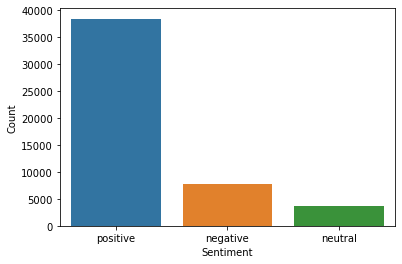

In [25]:
sns.countplot(df_final['classes']).set(xlabel="Sentiment",ylabel="Count")

In [26]:
# percentage

def pert_count(data,category):
    return (len(data[data['classes']==category])/len(data))*100

pert_count(df_final,'neutral')

7.458386683738796

In [27]:
pert_count(df_final,'negative')

15.667013444302178

In [28]:
pert_count(df_final,'positive')

76.87459987195902

In [29]:
# other way of doing the same
df_final['classes'].value_counts(normalize=True)*100

positive    76.874600
negative    15.667013
neutral      7.458387
Name: classes, dtype: float64

In [30]:
stopwards=set(STOPWORDS)
print(stopwords)

<WordListCorpusReader in 'C:\\Users\\NADEEM\\AppData\\Roaming\\nltk_data\\corpora\\stopwords'>


In [31]:
def word_cloud(data):
    wordcloud=WordCloud(
    background_color='black',
    max_font_size=40,
    max_words=200
    ).generate(str(data))
    plt.figure(figsize=(15,10))
    plt.axis("off")
    plt.imshow(wordcloud)
    plt.show()

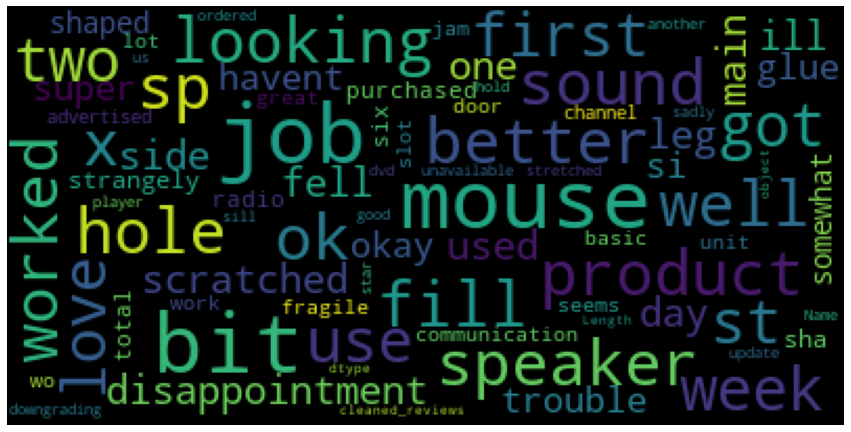

In [32]:
word_cloud(df_final[df_final['classes']=='neutral']['cleaned_reviews'])

Word Cloud For Positive


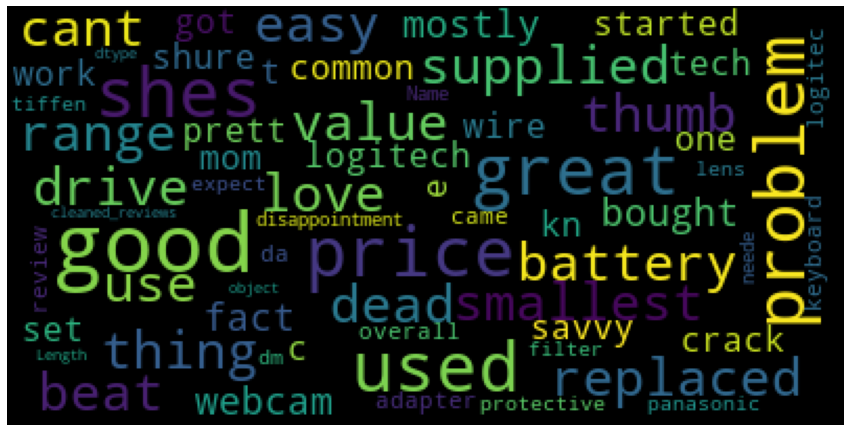

In [33]:
print('Word Cloud For Positive')
word_cloud(df_final[df_final['classes']=='positive']['cleaned_reviews'])

In [34]:
df_final['Polarity']=df_final['cleaned_reviews'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

In [35]:
df_final.head()
# polarity checks the negative and positive words from the text and returns a score which lies in between -1 to 1

,reviewText,summary,overall,Sentiment,cleaned_reviews,classes,Polarity
0,love these things the supplied batteries were...,Good headset Replaced batteries,5.0,2,love thing supplied battery dead replaced,positive,0.150000
1,great value good range and easy to use,Five Stars,5.0,2,great value good range easy use,positive,0.644444
2,smallest thumb drive ever cant beat the price,Five Stars,5.0,2,smallest thumb drive ever cant beat price,positive,0.000000
3,i bought this webcam mostly because of the pri...,Not a bad webcam for the price.,5.0,2,bought webcam mostly price fact logitech prett...,positive,0.258272
4,i got this for my mom shes not the most tech ...,Good webcam,5.0,2,got mom shes tech savvy set shes problem one t...,positive,0.281027


In [36]:
df_final['Polarity']

0        0.150000
1        0.644444
2        0.000000
3        0.258272
4        0.281027
           ...   
49995    0.145374
49996    0.800000
49997   -0.500000
49998    0.220000
49999    0.375000
Name: Polarity, Length: 49984, dtype: float64

Text(0.5, 1.0, 'Sentiment Distribution')

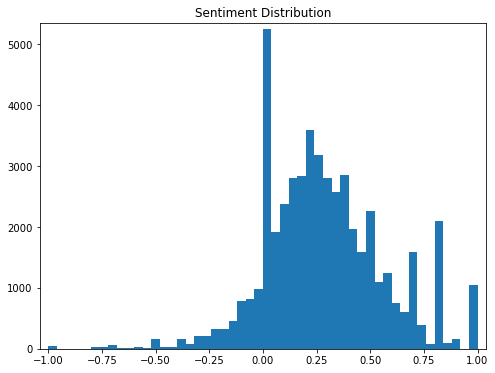

In [37]:
plt.figure(figsize=(8,6))
plt.margins(0.02)
plt.hist(df_final['Polarity'],bins=50)
plt.title('Sentiment Distribution')

In [38]:
#Advance Visualisation

def get_top_n_bigrams(corpus,n=None):
    vec=CountVectorizer(ngram_range=(2,2),stop_words='english').fit(corpus)
    bag_of_words=vec.transform(corpus)
    sum_words=bag_of_words.sum(axis=0)
    words_freq=[(word,sum_words[0,idx]) for word,idx in vec.vocabulary_.items()]
    words_freq=sorted(words_freq,key=lambda x: x[1],reverse=True)
    return words_freq[:n]

common_words_good=get_top_n_bigrams(df_final[df_final['classes']=='positive']['cleaned_reviews'],5)
common_words_neutral=get_top_n_bigrams(df_final[df_final['classes']=='neutral']['cleaned_reviews'],5)
common_words_bad=get_top_n_bigrams(df_final[df_final['classes']=='negative']['cleaned_reviews'],5)


In [39]:
def n_gram_plot(data,title,color):
    x=[x[0] for x in data]
    y=[x[1] for x in data]
    sns.barplot(y,x,color='{}'.format(color))
    plt.title('{}'.format(title))

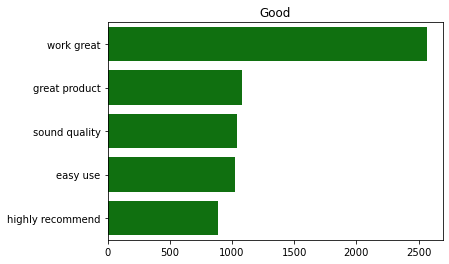

In [40]:
n_gram_plot(common_words_good,"Good","green")

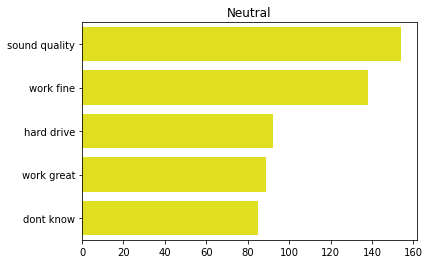

In [41]:
n_gram_plot(common_words_neutral,"Neutral","yellow")

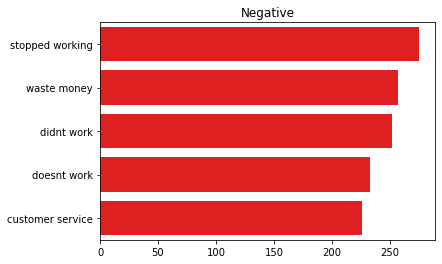

In [42]:
n_gram_plot(common_words_bad,"Negative","red")

In [43]:
df_final.head()

,reviewText,summary,overall,Sentiment,cleaned_reviews,classes,Polarity
0,love these things the supplied batteries were...,Good headset Replaced batteries,5.0,2,love thing supplied battery dead replaced,positive,0.150000
1,great value good range and easy to use,Five Stars,5.0,2,great value good range easy use,positive,0.644444
2,smallest thumb drive ever cant beat the price,Five Stars,5.0,2,smallest thumb drive ever cant beat price,positive,0.000000
3,i bought this webcam mostly because of the pri...,Not a bad webcam for the price.,5.0,2,bought webcam mostly price fact logitech prett...,positive,0.258272
4,i got this for my mom shes not the most tech ...,Good webcam,5.0,2,got mom shes tech savvy set shes problem one t...,positive,0.281027


In [44]:
X=df_final['cleaned_reviews']
Y=df_final['Sentiment']

In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, chi2

In [47]:
tfidf=TfidfVectorizer(ngram_range=(1,1))
rfc = RandomForestClassifier()

In [48]:
test_classifier_rfc=Pipeline([('vect',tfidf),('chi',SelectKBest(chi2,k=1200)),('clf',rfc)])

In [49]:
def run_model(test_classifier):
    print(test_classifier)
    classifier_model=test_classifier.fit(x_train,y_train)
    print(np.mean(classifier_model.predict(x_test)==y_test))

In [50]:
run_model(test_classifier_rfc)

Pipeline(steps=[('vect', TfidfVectorizer()),
                ('chi',
                 SelectKBest(k=1200,
                             score_func=<function chi2 at 0x0000005347B8F160>)),
                ('clf', RandomForestClassifier())])
0.8331009396786905


In [51]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
text_classifier_gradient=Pipeline([("vect",tfidf),("chi",SelectKBest(chi2,k=1200)),("gbc",gbc)])
run_model(text_classifier_gradient)

Pipeline(steps=[('vect', TfidfVectorizer()),
                ('chi',
                 SelectKBest(k=1200,
                             score_func=<function chi2 at 0x0000005347B8F160>)),
                ('gbc', GradientBoostingClassifier())])
0.8171567141558048


In [52]:
count_vec=CountVectorizer(ngram_range=(1,1))

text_classifier_Random_Forest_vect=Pipeline([("vect",count_vec),("chi",SelectKBest(chi2,k=1200)),("clf",rfc)])
run_model(text_classifier_Random_Forest_vect)

Pipeline(steps=[('vect', CountVectorizer()),
                ('chi',
                 SelectKBest(k=1200,
                             score_func=<function chi2 at 0x0000005347B8F160>)),
                ('clf', RandomForestClassifier())])
0.8321915732040012


In [53]:
count_vec=CountVectorizer(ngram_range=(2,2))

text_classifier_Random_Forest_vect=Pipeline([("vect",count_vec),("chi",SelectKBest(chi2,k=1200)),("clf",rfc)])
run_model(text_classifier_Random_Forest_vect)

Pipeline(steps=[('vect', CountVectorizer(ngram_range=(2, 2))),
                ('chi',
                 SelectKBest(k=1200,
                             score_func=<function chi2 at 0x0000005347B8F160>)),
                ('clf', RandomForestClassifier())])
0.8033343437405275


In [54]:
n_estimator=[100,200,300,400,500,600]

Scores=[]
for i in n_estimator:
    clf=text_classifier_rfc=Pipeline([("vect",tfidf),("chi",SelectKBest(chi2,k=1200)),("clf",RandomForestClassifier(n_estimators=i))])
    classifier_model=clf.fit(x_train,y_train)
    Scores.append(np.mean(classifier_model.predict(x_test)==y_test))

In [55]:
from sklearn.naive_bayes import MultinomialNB

alpha=[0.1,0.001,0.2,0.002]
Score=[]

for i in alpha:
    clf2=Pipeline([("vect",tfidf),("chi",SelectKBest(chi2,k=1200)),("clf2",MultinomialNB(alpha=i))])
    classifier_model2=clf2.fit(x_train,y_train)
    Score.append(np.mean(classifier_model2.predict(x_test)==y_test))   

In [56]:
Scores

[0.8318278266141255,
 0.8329796908153986,
 0.832555319793877,
 0.8318278266141255,
 0.8316459533191877,
 0.8326159442255229]

In [57]:
Score

[0.8067293119127008,
 0.8066686874810549,
 0.8055774477114277,
 0.8070324340709306]

In [58]:
def prediction(review):
    prediction_df=pd.DataFrame([[review,0]],columns=['reviewText','y'])
    prediction_df=text_processing(prediction_df)
    predictions_pred=clf2.predict(prediction_df['cleaned_reviews'])
    return predictions_pred[0]

In [59]:
prediction('could be better')

2

In [60]:
prediction("Worst product")

0

In [61]:
prediction("bit dissapointed")

2